# Рекомендация тарифов

***Описание проекта***

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

***Описание данных***

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:

    сalls — количество звонков,
    minutes — суммарная длительность звонков в минутах,
    messages — количество sms-сообщений,
    mb_used — израсходованный интернет-трафик в Мб,
    is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Откройте и изучите файл

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 

In [2]:
# Откроем файл и запишем датасет в переменную data
try:
    data = pd.read_csv('/datasets/users_behavior.csv')
except:
    data = pd.read_csv('users_behavior.csv')

In [3]:
# Посмотрим первые 10 строк
data.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [4]:
# Выведем общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


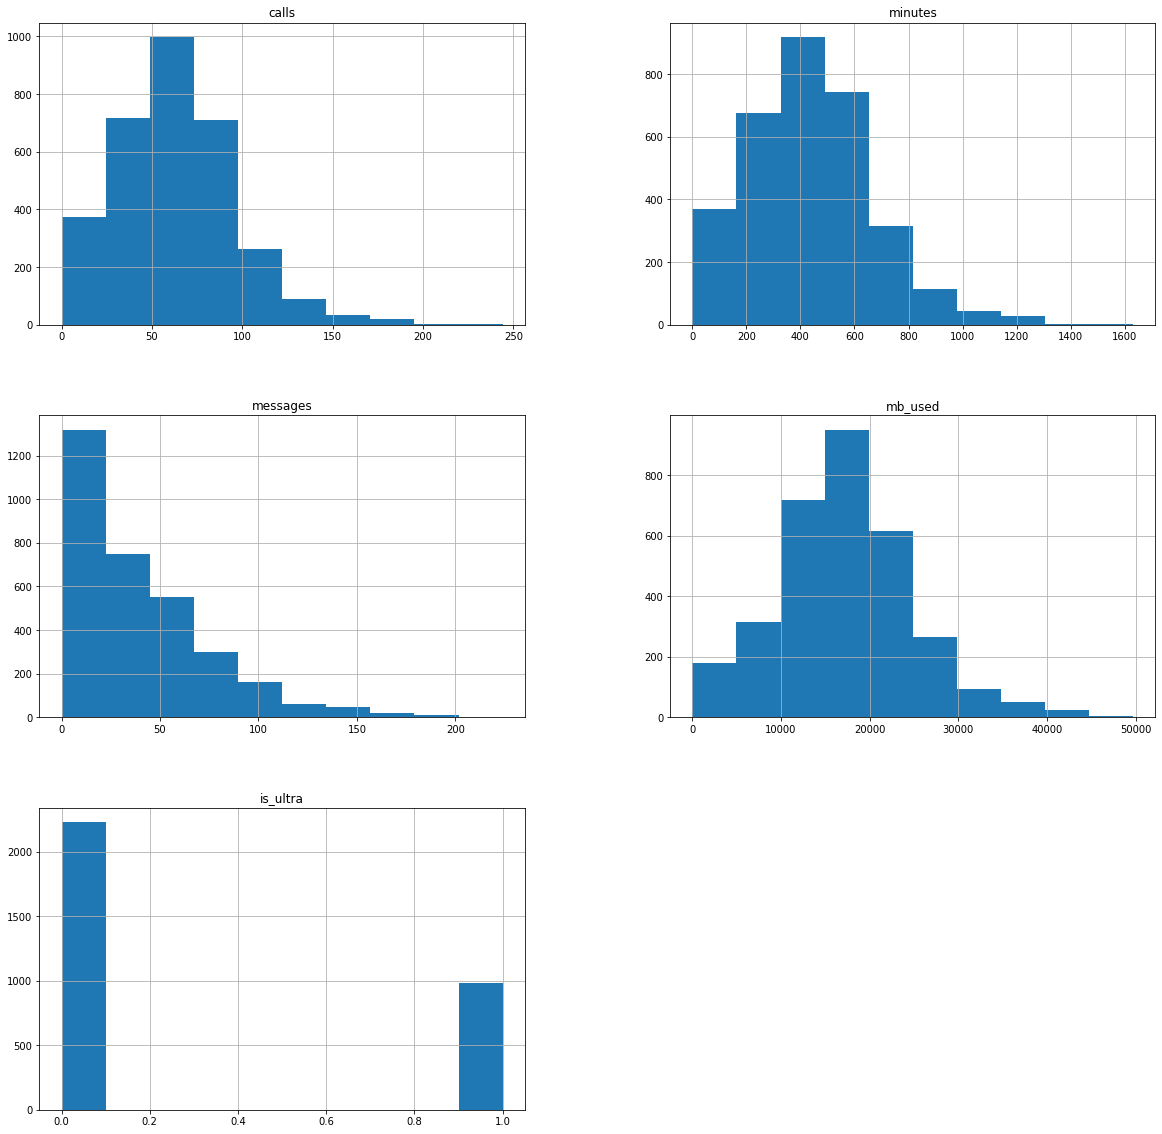

In [6]:
# Построим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(20, 20))
plt.show()

***Вывод:*** Файл содержит 3214 записей. Количество значений в столбцах совпадает, что говорит о том, что пропущенных значений нет. Типы данных и наименования столбцов корректны. Построена общая гистограмма для всех числовых столбцов таблицы.

## Разбейте данные на выборки

In [7]:
# Разделим датафрейм на обучающую, валидационную и тестовую выборку
data_train, x = train_test_split(data, test_size=0.2, random_state=12345)
data_valid, data_test = train_test_split(x, test_size=0.25, random_state=12345)

***Вывод:*** Два раза применив функцию, разделили датафрейм на обучающую, валидационную и тестовую выборку.

## Исследуйте модели

In [8]:
# Выделим признаки
features_train = data_train.drop(['is_ultra'], axis = 1)
target_train = data_train['is_ultra']

features_valid = data_valid.drop(['is_ultra'], axis = 1)
target_valid = data_valid['is_ultra']

features_test = data_test.drop(['is_ultra'], axis = 1)
target_test = data_test['is_ultra']

***Дерево решений***

In [9]:
# Создадим переменные для лучших гиперпараметров
best_parametrs = []
best_accuracy = 0

# В цикле последовательно меняем гиперпараметры
for max_depth in range(1,10):
    for min_samples_split in range(2,10):
        for min_samples_leaf in range(1,10):
            for criterion in ['gini', 'entropy']:
                
                # Подставим гиперпараметры в модель
                model_decision_tree = DecisionTreeClassifier(random_state=12345,
                                                      max_depth=max_depth,
                                                      min_samples_split=min_samples_split,
                                                      min_samples_leaf=min_samples_leaf,
                                                      criterion=criterion)
                
                # Обучение на тренировочной выборке
                model_decision_tree.fit(features_train, target_train)
                
                # Поиск предсказаний на валидационной выборке
                predictions = model_decision_tree.predict(features_valid)
                
                # Вычисление точности модели
                accuracy = accuracy_score(target_valid, predictions)
                
                # Сохранение лучших гиперпараметров
                if accuracy > best_accuracy:
                    best_parametrs = [max_depth, min_samples_split, min_samples_leaf, criterion]
                    best_accuracy = accuracy

# вывод лучших параметров
print('''Наилучшая точность: {}
Параметры модели:
   max_depth = {}
   min_samples_split = {}
   min_samples_leaf = {}
   criterion = {} '''.format(round(best_accuracy, 2),
                             best_parametrs[0],
                             best_parametrs[1],
                             best_parametrs[2],
                             best_parametrs[3]
                            ))

Наилучшая точность: 0.8
Парамтеры модели:
   max_depth = 5
   min_samples_split = 2
   min_samples_leaf = 6
   criterion = entropy 


***Случайный лес***

In [10]:
# Создадим переменные для лучших гиперпараметров
best_parametrs = []
best_accuracy = 0

# В цикле последовательно меняем гиперпараметры
for n_estimators in (1,10):
    for max_depth in range(1,10):
        for min_samples_split in range(2,10):
            for min_samples_leaf in range(1,10):
                for criterion in ['gini', 'entropy']:
                    
                    # Подставим гиперпараметры в модель
                    model_random_forest = RandomForestClassifier(random_state=12345,
                                                          n_estimators=n_estimators,
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split,
                                                          min_samples_leaf=min_samples_leaf,
                                                          criterion=criterion)
                    
                    # Обучение на тренировочной выборке
                    model_random_forest.fit(features_train, target_train)
                    
                    # Поиск предсказаний на валидационной выборке
                    predictions = model_random_forest.predict(features_valid)
                    
                    # Вычисление точности модели
                    accuracy = accuracy_score(target_valid, predictions)
                    
                    # Сохранение лучших гиперпараметров
                    if accuracy > best_accuracy:
                        best_parametrs = [n_estimators, max_depth, min_samples_split, min_samples_leaf, criterion]
                        best_accuracy = accuracy
                        
# вывод лучших параметров
print('''Наилучшая точность: {}
Параметры модели:
   n_estimators = {}
   max_depth = {}
   min_samples_split = {}
   min_samples_leaf = {}
   criterion = {} '''.format(round(best_accuracy, 2),
                             best_parametrs[0],
                             best_parametrs[1],
                             best_parametrs[2],
                             best_parametrs[3],
                             best_parametrs[4]
                            ))                       

Наилучшая точность: 0.82
Парамтеры модели:
   n_estimators = 1
   max_depth = 7
   min_samples_split = 2
   min_samples_leaf = 3
   criterion = gini 


***Логистическая регрессия***

In [11]:
# Подставим гиперпараметры в модель
model_logistic_regression = LogisticRegression(random_state=12345, solver='lbfgs', max_iter =1000)

# Обучение на тренировочной выборке
model_logistic_regression.fit(features_train, target_train)

# Поиск предсказаний на валидационной выборке
predictions = model_logistic_regression.predict(features_valid)

# Вычисление метрики модели    
result = model_logistic_regression.score(features_valid, target_valid)

# Вывод
print(result)  

0.7634854771784232


***Вывод:*** Наиболее подходящая модель - Случайный лес (Random Forest). Так как на валидационной выборке модель показала наиболее точные предсказания.

## Проверьте модель на тестовой выборке

In [12]:
# Проверим модель на тестовой выборке используя полученные ранее лучшие значения гиперпараметров
model_random_forest = RandomForestClassifier(random_state=12345,
                                                          n_estimators=1,
                                                          max_depth=7,
                                                          min_samples_split=2,
                                                          min_samples_leaf=3,
                                                          criterion='gini')
                    
# Обучение на тренировочной выборке
model_random_forest.fit(features_train, target_train)
                    
# Поиск предсказаний на тестовой выборке
predictions = model_random_forest.predict(features_test)
                    
# Вычисление точности модели
accuracy = accuracy_score(target_test, predictions)
                    
print('Точность Cлучайного леса на тестовой выборке:', accuracy)

Точность Cлучайного леса на тестовой выборке: 0.7701863354037267


***Вывод:*** Точность предсказания модели Случайный лес (Random Forest), с лучшими значениями гиперпараметров на тестовой выборке: 0.7701863354037267

## Вывод:

Были проанализированы различные классификационные модели: 
* Решающее дерево
* Случайный лес
* Логистическая регрессия 

Модели обучены. Найдено наиболее удачное сочетание гиперпараметров, необходимое для получения наилучшей точности.

Точность предсказания модели Случайный лес (Random Forest), с лучшими значениями гиперпараметров на тестовой выборке: 0.77